you may need to clean your data: for some NYC zip codes there may be no info      
sanity check: you should have 20 (Ntimestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)      
IMPORTANT: we talked about the importance of "whitening" your data: dividing each feature by its standard deviation.      
Whitenings decorrelates the data: it makes the features independent so that the data covariance matrix is the identity matrix. Whitening your data in time series analysis is in most cases wrong: you are modifying your time behaviour.           
Here instead you want to standardize your time series: subtract the mean and divide each time series (separately) by its standard deviation.           
As a sanity check (if you use skitlearn Kmeans or skitlearns kmeans2): you want your data array to be shaped Nzipcodes x Ntimestamps     
mydata.shape should be (Nzipcodes, Ntimestamps)     
mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))    
mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))      
### TASKS:    
1. get and prep your data.       
2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)     
3. plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).      
4. Use another clustering algorithm (of your choice)     
5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters    
6. Compare the results of the 2 algorithms     
7. attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator.     

## data cleaning

In [63]:
colors = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

In [2]:
import json
import pandas as pd
import zipfile 
import glob, os
import numpy as np
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
with open('nyc-zip-code-tabulation-areas-polygons.geojson') as data_file:    
    data = json.load(data_file)
# print(data)

In [4]:
nyc_zip = []
for department in data['features']:
    nyc_zip.append(str(department['properties']["postalCode"]))

In [5]:
# nyc_zip

In [6]:
import pandas as pd

import zipfile

al = range(1994,2014)
up = range(1998,2003)
fname0 = "zbp{0}totals.zip"
biz_zip = set()
for i in al:
    if i in up:
        st = str(i)[2:]
        fname = fname0.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'ZIP':str})
        df.columns=[u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est']
    else:
        st = str(i)[2:]
        fname = fname0.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'zip':str})
    new_zip = set(df.zip).intersection(set(nyc_zip))
    biz_zip = biz_zip.union(new_zip)

In [7]:
biz_zip = sorted(biz_zip)
biz_data_est = pd.DataFrame(np.nan,index=biz_zip,columns=al)
for i in al:
    if i in up:
        st = str(i)[2:]
        fname = fname0.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'ZIP':str})
        df.columns=[u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est']
    else:
        st = str(i)[2:]
        fname = fname0.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'zip':str})
    
    for j in biz_zip:
         if j in list(set(df.zip)):
                biz = df[df.zip==j]
                biz_data_est.loc[j][i]=int(biz.est)

biz_data_est = biz_data_est.dropna()
biz_zip = biz_data_est.index

In [19]:
biz_data_est

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
10001,6999,7088,7075,7154,7254,7233,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235,7273
10002,1784,1819,1919,2049,2003,2085,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954,2988
10003,3256,3377,3417,3535,3649,3659,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214,4277
10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,1479
10005,1076,1109,1216,1227,1270,1242,1287,1249,1244,1200,1226,1214,1259,1273,1291,1274,1266,1301,1273,1296
10006,1061,1002,969,990,1030,1059,1067,1026,934,862,869,870,874,863,845,828,843,834,850,852
10007,1307,1274,1254,1287,1282,1303,1327,1233,1620,1603,1635,1311,1292,1284,1313,1277,1330,1368,1400,1424
10009,634,633,673,747,786,804,860,869,921,953,982,1029,1016,1027,1066,1049,1090,1128,1176,1220
10010,3019,2987,3029,3112,3152,3143,3203,3178,3085,3045,3059,3060,3047,2948,3000,2938,2981,3022,3068,3091
10011,3301,3340,3392,3541,3599,3664,3653,3592,3682,3711,3729,3784,3823,3818,3887,3823,3852,3869,3841,3905


In [9]:
# WHITENING
wh_biz_zip = biz_data_est.copy()
for i in range(len(biz_zip)):
    wh_biz_zip.iloc[i] = (wh_biz_zip.iloc[i]-np.mean(wh_biz_zip.iloc[i]))/np.std(wh_biz_zip.iloc[i])

In [10]:
# wh_biz_zip

In [11]:
import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

## KMeans Clustering

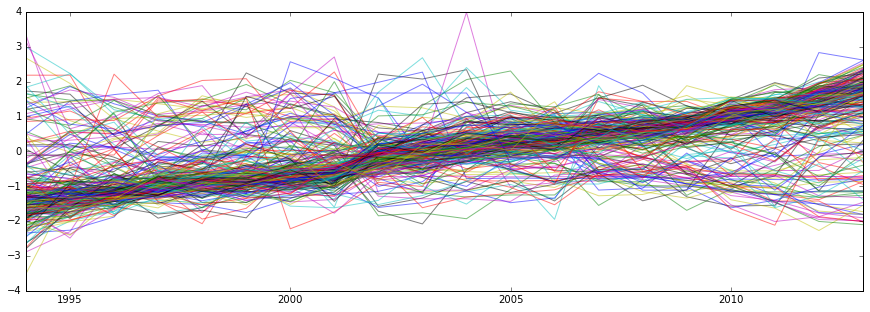

In [12]:
plt.figure(figsize=(15,5))
plt.xlim(1994,2013)
for i in range(len(wh_biz_zip)):
    plt.plot(wh_biz_zip.iloc[i].index, wh_biz_zip.iloc[i], '-', alpha=0.5)

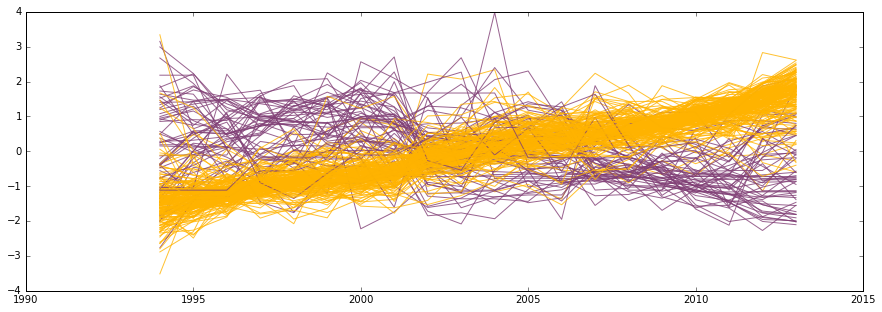

In [31]:
wh_biz_zip = wh_biz_zip.dropna()
est=sklearn.cluster.KMeans(n_clusters = 2,n_init=150)
est.fit(wh_biz_zip.values)
labels=est.labels_
centers = est.cluster_centers_

plt.figure(figsize=(15,5))
for i in range(len(wh_biz_zip)):
    plt.plot(wh_biz_zip.iloc[i].index, wh_biz_zip.iloc[i],c=colors[labels[i]], alpha=0.8)

2 clusters: 0.561611135742
3 clusters: 0.530531696129
4 clusters: 0.42388512067
5 clusters: 0.304010009639
6 clusters: 0.270201398467
7 clusters: 0.207802551399
8 clusters: 0.173114451397
9 clusters: 0.152651775681
10 clusters: 0.157742433132
11 clusters: 0.178000306785
Best for 2 clusters: 0.561611135742


/Users/Faye/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


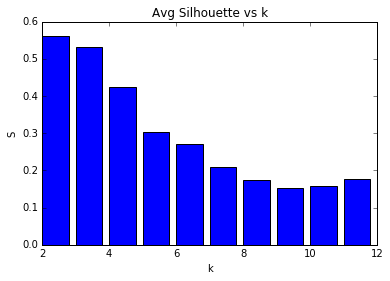

In [26]:
#perform the clustering for 10 different values of k from 2 to 11, compute the average 
#Silhouette score for each and pick up the k maximizing an average Silhouette score

s=[0]*10
for k in range(0,10):
    est=KMeans(n_clusters=k+2,n_init=150)
    est.fit(wh_biz_zip)
    s[k]=silhouette_score(wh_biz_zip, est.labels_)
    print('{0} clusters: {1}'.format(k+2,s[k]))
k=np.argmax(s)    
est=KMeans(n_clusters=k+2,n_init=100)
est.fit(wh_biz_zip)
labels=est.labels_
plt.figure()
plt.bar(range(2,12),s)
plt.xlabel('k')
plt.ylabel('S')
plt.title('Avg Silhouette vs k')
print('Best for {0} clusters: {1}'.format(k+2,silhouette_score(wh_biz_zip, labels)))

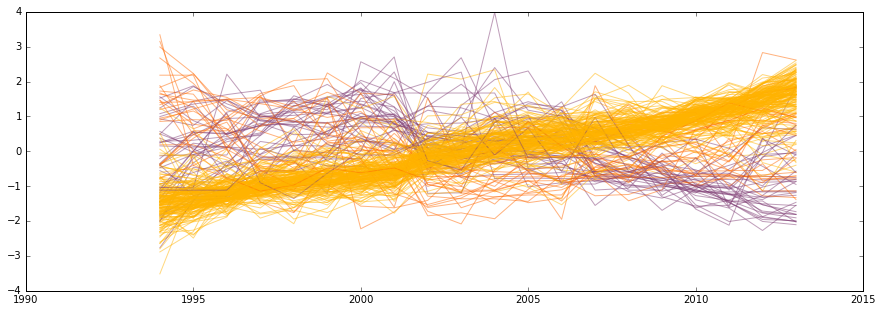

In [37]:
# Choose cluster=3, cluster and visualize
n=3
est=KMeans(n_clusters=n,n_init=150)
est.fit(wh_biz_zip)
labels=est.labels_

plt.figure(figsize=(15,5))
for i in range(len(wh_biz_zip)):
    plt.plot(wh_biz_zip.iloc[i].index, wh_biz_zip.iloc[i], c=colors[labels[i]], alpha=0.5)

In [42]:
# Use weighted average to calculate the cluster centers

wtmp = np.zeros((n, len(wh_biz_zip)))
for i in range(len(wh_biz_zip)): wtmp[labels[i]][i] = 1
clmeans = [np.average(wh_biz_zip, axis=0, weights=(wtmp[i])) for i in range(n)]

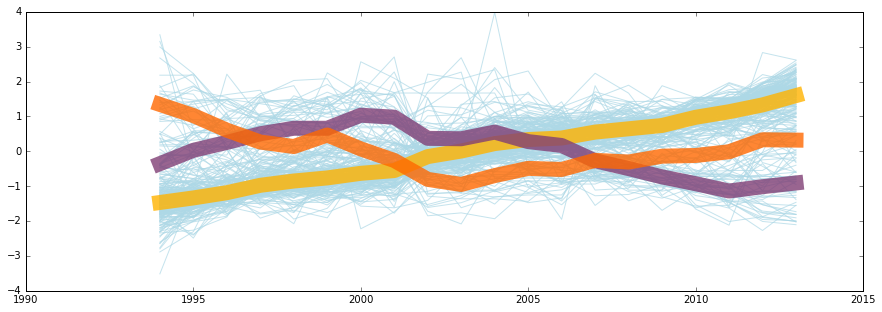

In [69]:
# Visualization of the cluster centers

plt.figure(figsize=(15,5))
for i in range(len(wh_biz_zip)):
    plt.plot(wh_biz_zip.iloc[i],c='lightblue',alpha=0.7)
for i in range(n):
    plt.plot(range(1994,2014),clmeans[i],c=colors[i],linewidth=15,alpha=0.8)

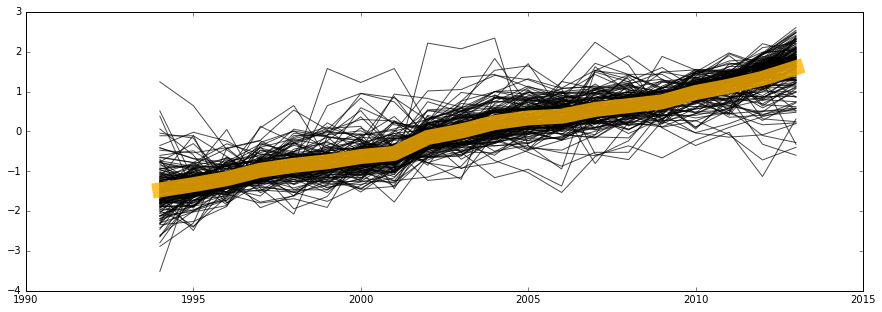

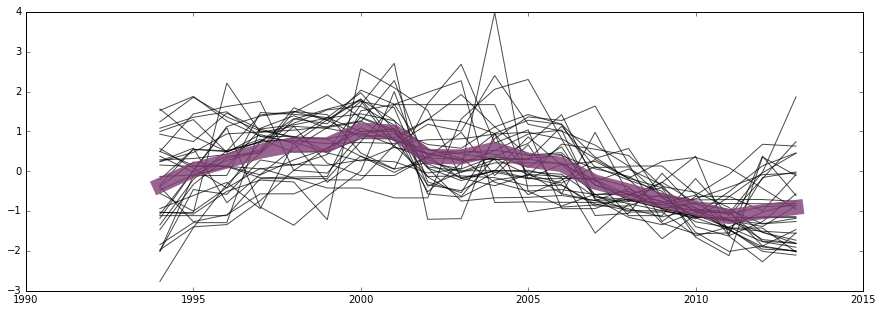

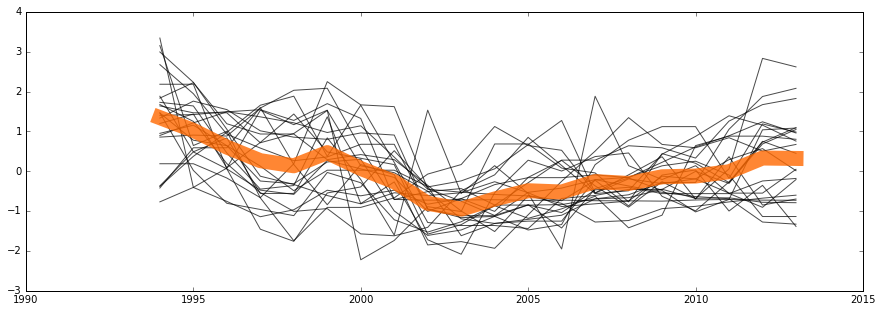

In [71]:
# Visualization of each cluster center
for i in range(n):
    plt.figure(figsize=(15,5))
    for j in range(len(wh_biz_zip)):
        if labels[j] == i:
            plt.plot(wh_biz_zip.iloc[j],c='black',alpha=0.7)
    plt.plot(range(1994,2014),clmeans[i],c=colors[i],linewidth=15,alpha=0.8)

IndexError: single positional indexer is out-of-bounds

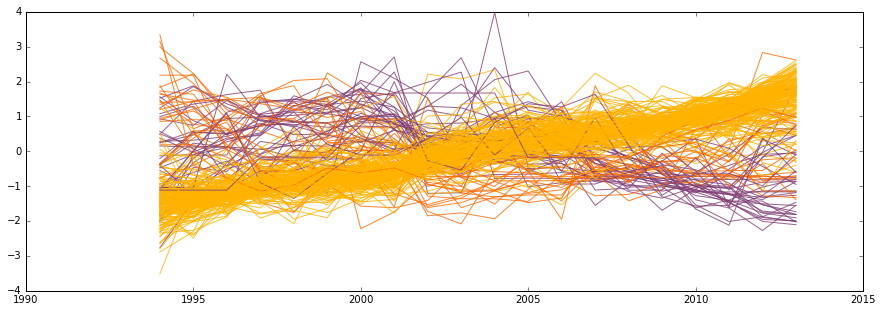

In [76]:
# Try hierarchical clustering

from sklearn.cluster import AgglomerativeClustering
est=AgglomerativeClustering(n_clusters=n)
est.fit(wh_biz_zip)
labels2=est.labels_

plt.figure(figsize=(15,5))
for i in range(243):
    plt.plot(wh_biz_zip.iloc[i],c=colors[labels[i]],alpha=0.8)